# Importações

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetV2L
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet121, InceptionV3, EfficientNetV2L
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard, EarlyStopping
import os
import time
import psutil


# Diretório

In [8]:
# Diretórios principais
base_dir = "C:\\Users\\Emanoel\\Desktop\\Caio_DeletarDepois24-08\\Projtects\\Data_classificacao"
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')


# processed_train_dir = 'C:\\Users\\User\\Desktop\\Caio_DeletarDepoisDoDia24\\Data\\processed_train'
# processed_test_dir = 'C:\\Users\\User\\Desktop\\Caio_DeletarDepoisDoDia24\\Data\\processed_test'

# Pre processamento

### Verificando o pré-processamento

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


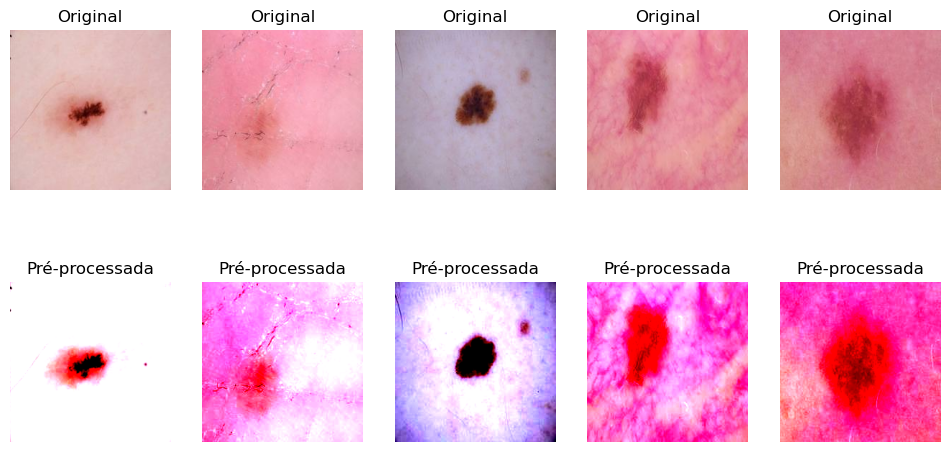

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os


# Função para carregar e pré-processar imagens com BICUBIC
def load_and_preprocess_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224], method=tf.image.ResizeMethod.BICUBIC)
    image = (image / 255.0 - [0.485, 0.456, 0.406]) / [0.229, 0.224, 0.225]
    return image

# Função para carregar uma amostra de imagens
def load_sample_images(directory, num_images=5):
    file_paths = [os.path.join(directory, fname) for fname in os.listdir(directory)[:num_images]]
    images = [load_and_preprocess_image(fp).numpy() for fp in file_paths]
    return file_paths, images

# Carregar uma amostra de imagens
file_paths, images = load_sample_images(os.path.join(train_dir, 'Benign'))

# Função para plotar imagens
def plot_images(file_paths, images):
    plt.figure(figsize=(12, 6))
    for i in range(len(file_paths)):
        plt.subplot(2, len(file_paths), i + 1)
        plt.imshow(tf.image.decode_jpeg(tf.io.read_file(file_paths[i])).numpy())
        plt.title('Original')
        plt.axis('off')
        
        plt.subplot(2, len(file_paths), len(file_paths) + i + 1)
        plt.imshow(images[i])
        plt.title('Pré-processada')
        plt.axis('off')
    
    plt.show()

# Plotar imagens originais e pré-processadas
plot_images(file_paths, images)


### Criando um dataset pre-processado

In [12]:
# import tensorflow as tf
# import os

# # Diretórios de dados
# # Diretórios principais
# base_dir = "C:\\Users\\Emanoel\\Desktop\\Caio_DeletarDepois24-08\\Projtects\\Data_classificacao"
# train_dir = os.path.join(base_dir,'train')
# test_dir = os.path.join(base_dir, 'test')
# processed_train_dir = os.path.join(base_dir, 'processed_train')
# processed_test_dir = os.path.join(base_dir, 'processed_test')

# # Criar diretórios para imagens pré-processadas
# os.makedirs(processed_train_dir, exist_ok=True)
# os.makedirs(processed_test_dir, exist_ok=True)

# def load_and_preprocess_image(file_path):
#     image = tf.io.read_file(file_path)
#     image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.resize(image, [224, 224], method=tf.image.ResizeMethod.BICUBIC)
#     image = (image / 255.0 - [0.485, 0.456, 0.406]) / [0.229, 0.224, 0.225]
#     return image

# def save_image(image, file_path):
#     image = tf.image.encode_jpeg(tf.cast(image * 255.0, tf.uint8))
#     tf.io.write_file(file_path, image)

# def process_and_save_images(directory, output_directory):
#     for label_dir in os.listdir(directory):
#         label_path = os.path.join(directory, label_dir)
#         output_label_path = os.path.join(output_directory, label_dir)
#         os.makedirs(output_label_path, exist_ok=True)
        
#         for image_file in os.listdir(label_path):
#             file_path = os.path.join(label_path, image_file)
#             image = load_and_preprocess_image(file_path)
#             output_file_path = os.path.join(output_label_path, image_file)
#             save_image(image, output_file_path)

# # Pré-processar e salvar imagens de treinamento e teste
# process_and_save_images(train_dir, processed_train_dir)
# process_and_save_images(test_dir, processed_test_dir)


# Data augmentation 

In [10]:

# Diretórios de dados
base_dir = "C:\\Users\\Emanoel\\Desktop\\Caio_DeletarDepois24-08\\Projtects\\Data_classificacao"
processed_train_dir = os.path.join(base_dir, 'processed_train')
processed_test_dir = os.path.join(base_dir, 'processed_test')

# Configuração para data augmentation com divisão para validação
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizar a imagem
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Percentual para validação
)

# Criar geradores de dados
train_generator = train_datagen.flow_from_directory(
    processed_train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Usar apenas a parte de treinamento
)

validation_generator = train_datagen.flow_from_directory(
    processed_train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Usar apenas a parte de validação
)

# Configuração para teste
test_datagen = ImageDataGenerator(rescale=1./255)  # Apenas normalização

test_generator = test_datagen.flow_from_directory(
    processed_test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 9504 images belonging to 2 classes.
Found 2375 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# CallBacks

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard, EarlyStopping, Callback
import time
import psutil

# Dicionário para armazenar históricos
histories = {}

# Classe para monitorar recursos
class ResourceMonitor(Callback):
    def on_train_begin(self, logs=None):
        self.train_start_time = time.time()
        self.process = psutil.Process()
        self.cpu_usages = []
        self.memory_usages = []
        self.logs = {
            "epoch": [],
            "cpu_usage": [],
            "memory_usage": [],
            "elapsed_time": []
        }

    def on_epoch_end(self, epoch, logs=None):
        # Capture CPU and memory usage at the end of each epoch
        cpu_usage = self.process.cpu_percent(interval=None)
        memory_info = self.process.memory_info()
        memory_usage = memory_info.rss / (1024 * 1024)  # Convert bytes to MB
        elapsed_time = time.time() - self.train_start_time
        
        self.cpu_usages.append(cpu_usage)
        self.memory_usages.append(memory_usage)

        # Store in logs
        self.logs["epoch"].append(epoch + 1)
        self.logs["cpu_usage"].append(cpu_usage)
        self.logs["memory_usage"].append(memory_usage)
        self.logs["elapsed_time"].append(elapsed_time)

        print(f"Epoch {epoch + 1}: CPU usage: {cpu_usage}%, Memory usage: {memory_usage} MB, Elapsed time: {elapsed_time:.2f} seconds")
    
    def on_train_end(self, logs=None):
        self.train_end_time = time.time()
        self.total_training_time = self.train_end_time - self.train_start_time
        print(f"Total training time: {self.total_training_time:.2f} seconds")
        print(f"Average CPU usage: {sum(self.cpu_usages) / len(self.cpu_usages):.2f}%")
        print(f"Average Memory usage: {sum(self.memory_usages) / len(self.memory_usages):.2f} MB")
        
        # Store final training time
        self.logs["total_training_time"] = self.total_training_time
        self.logs["average_cpu_usage"] = sum(self.cpu_usages) / len(self.cpu_usages)
        self.logs["average_memory_usage"] = sum(self.memory_usages) / len(self.memory_usages)
    
    def get_logs(self):
        return self.logs

# Callbacks ajustados
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)
tensorboard = TensorBoard(log_dir='./logs')
resource_monitor = ResourceMonitor()
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
callbacks = [checkpoint, reduce_lr, tensorboard, resource_monitor, early_stop]

# Resto do código continua aqui...


# Modelos

### VGG16

In [43]:
def create_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

### ResNet50

In [44]:
def create_resnet50_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

### DenseNet121

In [45]:
def create_densenet121_model():
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

### InceptionV3

In [46]:
def create_inceptionv3_model():
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

### EfficientNetV2L

In [14]:

def create_efficientnetv2l_model():
    base_model = EfficientNetV2L(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [48]:
model_functions = [
    create_vgg16_model,
    create_resnet50_model,
    create_densenet121_model,
    create_inceptionv3_model,
    create_efficientnetv2l_model
]


### Função para treinar os modelos

In [18]:
def save_model(model, model_name):
    model.save(f'{model_name}.h5')

In [49]:
# Função para treinar os modelos e capturar logs de recursos
def train_models(model_functions, train_generator, validation_generator, epochs=5, callbacks=None):
    for func in model_functions:
        model_name = func.__name__
        print(f"Treinando o modelo: {model_name}")
        model = func()
        resource_monitor = ResourceMonitor()  # Crie uma nova instância para cada modelo
        callbacks_with_monitor = callbacks + [resource_monitor]  # Adicione o monitor aos callbacks
        
        history = model.fit(
            train_generator,
            epochs=epochs,
            validation_data=validation_generator,
            callbacks=callbacks_with_monitor
        )
        
        histories[model_name] = (history, resource_monitor.get_logs())  # Armazene o history e os logs
        print(f"Treinamento do {model_name} concluído.")

        # Salvar o modelo treinado
        save_model(model, model_name)




In [50]:
# Treinar os modelos
train_models(model_functions, train_generator, validation_generator, epochs=5, callbacks=callbacks)


Treinando o modelo: create_vgg16_model
Epoch 1/5


c:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 71/297 ━━━━━━━━━━━━━━━━━━━━ 26:12 7s/step - accuracy: 0.4840 - loss: 3.1519

In [18]:
# Função para extrair métricas e logs de recursos
def extract_metrics(histories):
    # Listas para armazenar os dados
    epochs_list = []
    accuracy_list = []
    val_accuracy_list = []
    loss_list = []
    val_loss_list = []
    cpu_usage_list = []
    memory_usage_list = []
    elapsed_time_list = []
    
    # Iterar sobre os históricos dos modelos
    for model_name, (history, resource_logs) in histories.items():
        # Extrair as métricas de cada modelo
        history_dict = history.history
        epochs = list(range(1, len(history_dict['accuracy']) + 1))
        epochs_list.extend(epochs)
        accuracy_list.extend(history_dict['accuracy'])
        val_accuracy_list.extend(history_dict['val_accuracy'])
        loss_list.extend(history_dict['loss'])
        val_loss_list.extend(history_dict['val_loss'])
        
        # Adicionar métricas de uso de recursos
        cpu_usage_list.extend(resource_logs['cpu_usage'])
        memory_usage_list.extend(resource_logs['memory_usage'])
        elapsed_time_list.extend(resource_logs['elapsed_time'])
    
    # Criar um DataFrame para armazenar as métricas e uso de recursos
    df = pd.DataFrame({
        'Epoch': epochs_list,
        **{f'{model_name}_accuracy': accuracy_list[i::len(histories)] for i, model_name in enumerate(histories)},
        **{f'{model_name}_val_accuracy': val_accuracy_list[i::len(histories)] for i, model_name in enumerate(histories)},
        **{f'{model_name}_loss': loss_list[i::len(histories)] for i, model_name in enumerate(histories)},
        **{f'{model_name}_val_loss': val_loss_list[i::len(histories)] for i, model_name in enumerate(histories)},
        'CPU_usage': cpu_usage_list,
        'Memory_usage': memory_usage_list,
        'Elapsed_time': elapsed_time_list
    })
    
    return df




In [ ]:

# Extrair as métricas e logs de recursos
metrics_df = extract_metrics(histories)

# Salvar o DataFrame em um arquivo CSV
metrics_df.to_csv('model_metrics_comparison_with_resources.csv', index=False)

# Salvando as metricas

In [20]:
# Função para extrair métricas e logs de recursos
def extract_metrics(histories):
    # Listas para armazenar os dados
    epochs_list = []
    accuracy_list = []
    val_accuracy_list = []
    loss_list = []
    val_loss_list = []
    cpu_usage_list = []
    memory_usage_list = []
    elapsed_time_list = []
    
    # Iterar sobre os históricos dos modelos
    for model_name, (history, resource_logs) in histories.items():
        # Extrair as métricas de cada modelo
        history_dict = history.history
        epochs = list(range(1, len(history_dict['accuracy']) + 1))
        epochs_list.extend(epochs)
        accuracy_list.extend(history_dict['accuracy'])
        val_accuracy_list.extend(history_dict['val_accuracy'])
        loss_list.extend(history_dict['loss'])
        val_loss_list.extend(history_dict['val_loss'])
        
        # Adicionar métricas de uso de recursos
        cpu_usage_list.extend(resource_logs['cpu_usage'])
        memory_usage_list.extend(resource_logs['memory_usage'])
        elapsed_time_list.extend(resource_logs['elapsed_time'])
    
    # Criar um DataFrame para armazenar as métricas e uso de recursos
    df = pd.DataFrame({
        'Epoch': epochs_list,
        **{f'{model_name}_accuracy': accuracy_list[i::len(histories)] for i, model_name in enumerate(histories)},
        **{f'{model_name}_val_accuracy': val_accuracy_list[i::len(histories)] for i, model_name in enumerate(histories)},
        **{f'{model_name}_loss': loss_list[i::len(histories)] for i, model_name in enumerate(histories)},
        **{f'{model_name}_val_loss': val_loss_list[i::len(histories)] for i, model_name in enumerate(histories)},
        'CPU_usage': cpu_usage_list,
        'Memory_usage': memory_usage_list,
        'Elapsed_time': elapsed_time_list
    })
    
    return df




In [ ]:
# Extrair as métricas e logs de recursos
metrics_df = extract_metrics(histories)

# Salvar o DataFrame em um arquivo CSV
metrics_df.to_csv('model_metrics_comparison_with_resources.csv', index=False)

# Avaliando o modelo

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

def evaluate_model(model, test_dataset, class_names):
    # Avaliar o modelo no conjunto de teste
    scores = model.evaluate(test_dataset)
    print(f"Loss: {scores[0]}")
    print(f"Accuracy: {scores[1]}")
    
    # Obter previsões
    y_true = test_dataset.classes  # Classes verdadeiras
    y_pred = np.argmax(model.predict(test_dataset), axis=-1)  # Classes preditas
    
    # Relatório de classificação
    class_report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    
    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    
    # Obter a figura para salvar
    confusion_matrix_figure = plt.gcf()
    plt.close()  # Fechar o plot para evitar sobreposição
    
    # Calcular métricas
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    metrics = {
        "loss": scores[0],
        "accuracy": scores[1],
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }
    
    # Converter as métricas e relatório de classificação em DataFrames
    metrics_df = pd.DataFrame([metrics])
    class_report_df = pd.DataFrame(class_report).transpose()
    
    return metrics_df, class_report_df, confusion_matrix_figure


In [23]:
def evaluate_all_models(model_dict, test_dataset, class_names):
    metrics_dfs = []
    class_report_dfs = []
    confusion_matrices = []
    
    for model_name, model in model_dict.items():
        print(f"Avaliando o modelo: {model_name}")
        metrics_df, class_report_df, cm_figure = evaluate_model(model, test_dataset, class_names)
        
        # Adicionar ao DataFrame de métricas
        metrics_df['model'] = model_name
        metrics_dfs.append(metrics_df)
        
        # Adicionar ao DataFrame de relatórios de classificação
        class_report_df['model'] = model_name
        class_report_dfs.append(class_report_df)
        
        # Salvar a matriz de confusão
        cm_figure.savefig(f'{model_name}_confusion_matrix.png')
    
    # Concatenar os DataFrames
    metrics_df_combined = pd.concat(metrics_dfs, ignore_index=True)
    class_report_df_combined = pd.concat(class_report_dfs, ignore_index=True)
    
    return metrics_df_combined, class_report_df_combined


In [ ]:
# Nome das classes
class_names = ['Benigno', 'Maligno']

# Avaliar todos os modelos
metrics_df, class_report_df = evaluate_all_models(model_dict, test_generator, class_names)

# Salvar os DataFrames em arquivos CSV
metrics_df.to_csv('model_metrics_comparison.csv', index=False)
class_report_df.to_csv('classification_reports.csv', index=False)

# Modelo Final

#### EfficientNetV2L

In [25]:
efficientnetv2l_model = create_efficientnetv2l_model()

#### Treinar o modelo

In [28]:
history = efficientnetv2l_model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=callbacks
)

# Salvar o histórico do treinamento
histories['EfficientNetV2L'] = history

# Extrair e salvar as métricas e logs de recursos após o treinamento
resource_logs = {'EfficientNetV2L': resource_monitor.get_logs()}
metrics_df = extract_metrics(histories, resource_logs)
metrics_df.to_csv('efficientnetv2l_metrics_with_resources.csv', index=False)

Epoch 1/100


C:\Users\Emanoel\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.8017 - loss: 0.4500 Epoch 1: CPU usage: 0.0%, Memory usage: 20851.08984375 MB, Elapsed time: 4423.05 seconds
297/297 ━━━━━━━━━━━━━━━━━━━━ 4423s 14s/step - accuracy: 0.8018 - loss: 0.4497 - val_accuracy: 0.4728 - val_loss: 0.7094 - learning_rate: 0.0010
Epoch 2/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.8610 - loss: 0.3275 Epoch 2: CPU usage: 426.2%, Memory usage: 19504.10546875 MB, Elapsed time: 8633.91 seconds
297/297 ━━━━━━━━━━━━━━━━━━━━ 4211s 14s/step - accuracy: 0.8610 - loss: 0.3275 - val_accuracy: 0.7200 - val_loss: 0.5293 - learning_rate: 0.0010
Epoch 3/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.8722 - loss: 0.3017 Epoch 3: CPU usage: 428.2%, Memory usage: 19607.05078125 MB, Elapsed time: 12934.72 seconds
297/297 ━━━━━━━━━━━━━━━━━━━━ 4301s 14s/step - accuracy: 0.8722 - loss: 0.3017 - val_accuracy: 0.5377 - val_loss: 1.3228 - learning_rate: 0.0010
Epoch 4/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 14s

TypeError: extract_metrics() takes 1 positional argument but 2 were given

In [32]:
# Salvar o modelo treinado no formato .keras
efficientnetv2l_model.save('efficientnetv2l_model.keras')


In [36]:
from tensorflow.keras.models import load_model

# Carregar o melhor modelo salvo durante o treinamento
best_model = load_model('best_model.keras')


In [38]:
# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = best_model.evaluate(test_generator, verbose=1)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.8882 - loss: 0.2483
Test Loss: 0.25130555033683777
Test Accuracy: 0.8880000114440918


In [40]:
import numpy as np

# Obter previsões no conjunto de teste
predictions = best_model.predict(test_generator)

# Converter as previsões para rótulos
predicted_labels = np.argmax(predictions, axis=1)

# Obter os rótulos verdadeiros do gerador de teste
true_labels = test_generator.classes

# Comparar previsões com rótulos verdadeiros
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report')
print(classification_report(true_labels, predicted_labels))

print('Confusion Matrix')
print(confusion_matrix(true_labels, predicted_labels))


63/63 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step
Classification Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1000
           1       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000

Confusion Matrix
[[1000    0]
 [1000    0]]


C:\Users\Emanoel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Emanoel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Emanoel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
efficientnetv2l_model = load_model('efficientnetv2l_model.keras')

C:\Users\Emanoel\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 899 variables whereas the saved optimizer has 1796 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [44]:
# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = efficientnetv2l_model.evaluate(test_generator, verbose=1)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.8827 - loss: 0.2529
Test Loss: 0.2513055205345154
Test Accuracy: 0.8880000114440918


In [46]:
import numpy as np

# Obter previsões no conjunto de teste
predictions = efficientnetv2l_model.predict(test_generator)

# Converter as previsões para rótulos
predicted_labels = np.argmax(predictions, axis=1)

# Obter os rótulos verdadeiros do gerador de teste
true_labels = test_generator.classes

# Comparar previsões com rótulos verdadeiros
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report')
print(classification_report(true_labels, predicted_labels))

print('Confusion Matrix')
print(confusion_matrix(true_labels, predicted_labels))

63/63 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step
Classification Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1000
           1       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000

Confusion Matrix
[[1000    0]
 [1000    0]]


C:\Users\Emanoel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Emanoel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Emanoel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
